<a href="https://colab.research.google.com/github/Ramireddyjyothsna/Crop-disease-detection-DL/blob/main/Model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 6
EPOCHS = 20

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\ramir\Downloads\FAST TRACK FALL SEM(2023-24)\DL\DL Project\PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 6243 files belonging to 6 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
len(dataset)

196

In [ ]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    break

(32, 256, 256, 3)
[3 3 3 1 5 3 0 5 0 0 5 0 0 1 2 1 1 0 5 5 0 5 5 4 0 0 3 0 5 3 0 5]


### Visualize the data

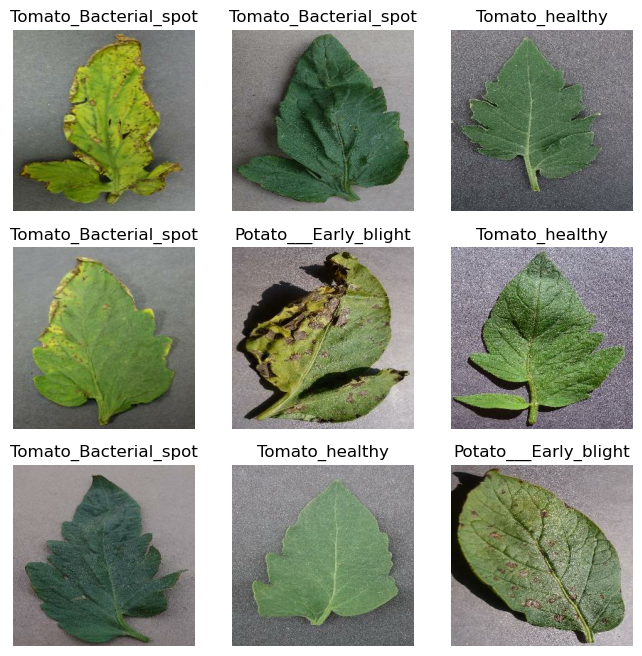

In [ ]:
plt.figure(figsize = (8,8))
for images,labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
train_size = 0.8
len(dataset)*train_size

156.8

In [ ]:
train_ds = dataset.take(156)
len(train_ds)

156

In [ ]:
test_ds = dataset.skip(156)
len(test_ds)

40

In [ ]:
val_size = 0.1
len(dataset)*val_size

19.6

In [ ]:
val_ds = test_ds.take(19)
len(val_ds)

19

In [ ]:
test_ds = test_ds.skip(19)
len(test_ds)

21

In [ ]:
def datset_partitions(ds,train_split = 0.8,
                      val_split=0.1,test_ds = 0.1,
                     shuffle = True,shuffle_size=10000):
    ds_size = len(ds)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds = datset_partitions(dataset)

### Pre-processing

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

### Building a model

In [ ]:
input_shape = (32,256,256,3)
n_classes = 6

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

### Model Architecture

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_11 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_15 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                               

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
EPOCHS = 20
BATCH_SIZE=32
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/20
156/156 [==============================] - 418s 3s/step - loss: 1.3016 - accuracy: 0.4960 - val_loss: 1.3751 - val_accuracy: 0.5493
Epoch 2/20
110/156 [====================>.........] - ETA: 1:53 - loss: 0.5681 - accuracy: 0.7903

In [ ]:
scores = model.evaluate(test_ds)

14/14 [==============================] - 17s 654ms/step - loss: 0.0504 - accuracy: 0.9799


In [ ]:
scores

[0.05042870715260506, 0.9799107313156128]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 102}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

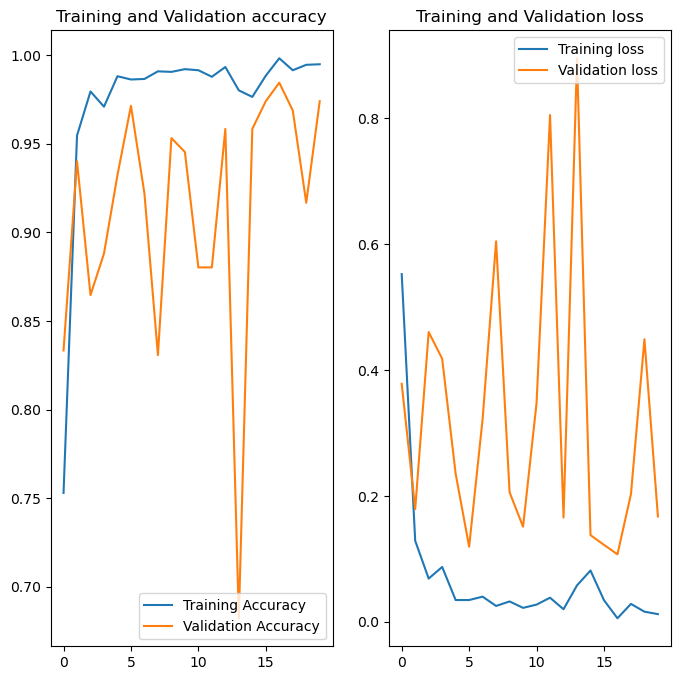

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

In [ ]:
print("Predicted_label: ",batch_prediction[0])

Predicted_label:  [1.0000000e+00 4.2546914e-20 1.4759775e-11]


First image to predict
Actual label:  Tomato_Bacterial_spot
1/1 [==============================] - 1s 840ms/step
Predicted_label:  Tomato_Bacterial_spot


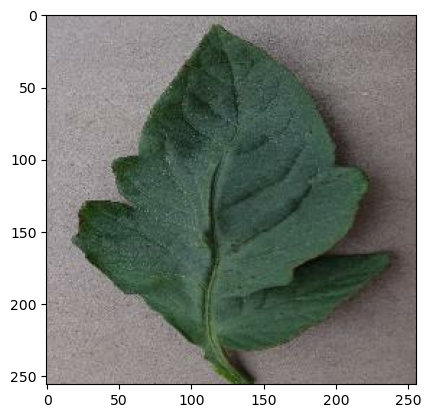

In [ ]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label: ",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted_label: ",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 110ms/step


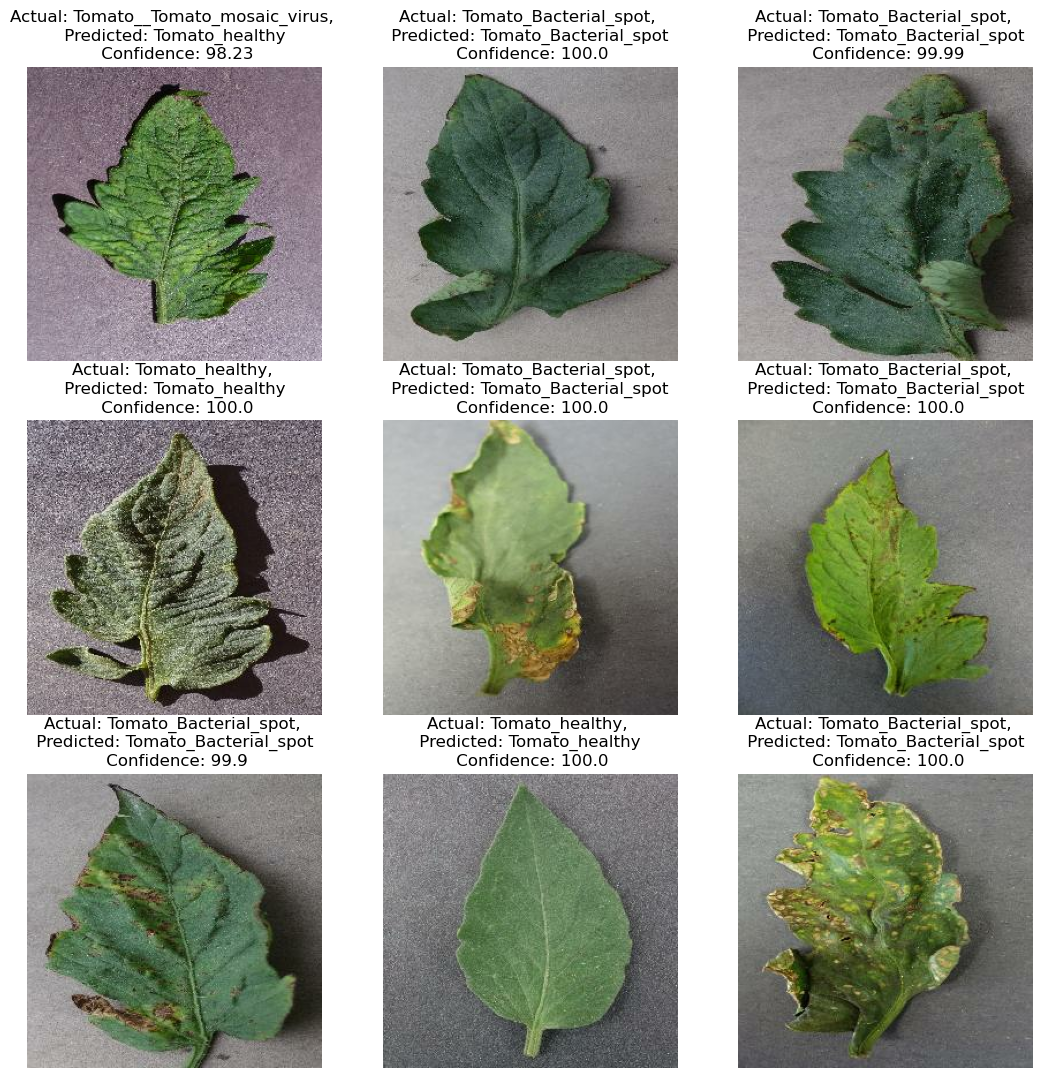

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))


        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class} \n Confidence: {confidence}")
        plt.axis('off')